# Pymaceuticals Inc.
---

### Analysis

- looking at my data that I was able to clean the drug called Capomulin and Ramicane seem to be the most efficient, and showed the best treatments to Cancer compared to the other drugs. 
- According to the bar graphs the Drug Propriva preformed the worst and will most likely not get selected as the main Drug towards Cancer treatments.
- From the scatter plot it is noticable that mouse that have a higher weight are more likely to have larger tumors, while the smaller mouse had a much smaller tumor. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
final_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
final_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_total = len(final_data["Mouse ID"].unique())
mice_total

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = final_data[final_data.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_data = final_data.loc[final_data["Mouse ID"] == mice_duplicate]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = final_data.drop_duplicates(subset=["Mouse ID"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_total_clean = len(clean_data["Mouse ID"].unique())
mice_total_clean

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = final_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Varience',
    'std': 'Tumor Volume Std.Dev.',
    'sem': 'Tumor Volume Std. Err'
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std.Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = final_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

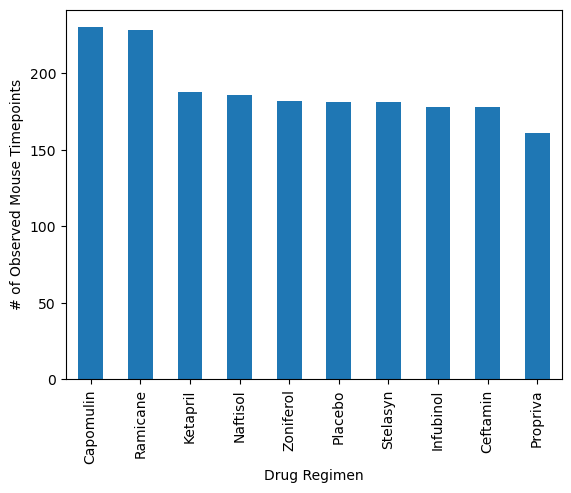

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_data = final_data["Drug Regimen"].value_counts()
drug_data.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

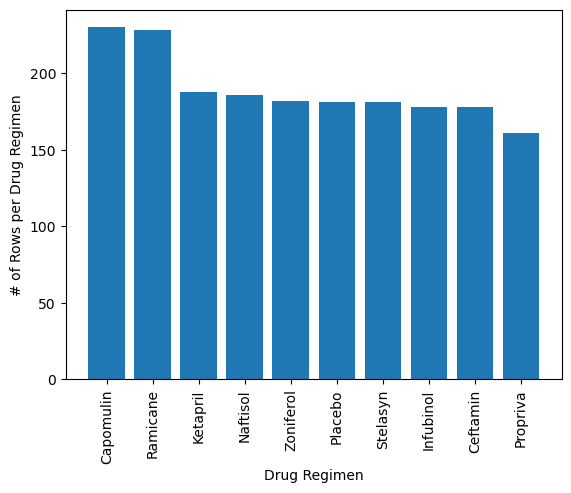

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = drug_data.index
count = drug_data.values
plt.bar(drugs, count)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Rows per Drug Regimen")

plt.xticks(rotation=90)
plt.show()

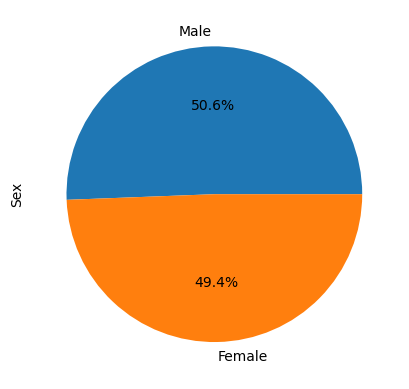

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_value = final_data["Sex"].value_counts()
Sex = ["Male", "Female"]
gender_value.plot.pie(autopct='%1.1f%%')
plt.show()

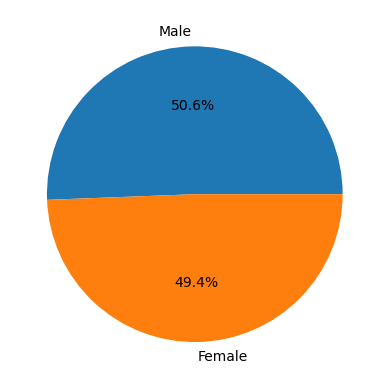

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_value = final_data["Sex"].value_counts()
gender = gender_value.index
count = gender_value.values
plt.pie(count, labels=gender, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_data[final_data["Drug Regimen"].isin(final_tumor)].groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame(last_timepoint)
tumor_volume = pd.merge(last_timepoint_df, final_data, on=["Mouse ID", "Timepoint"])
tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes_tumor = tumor_volume.loc[tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(volumes_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = volumes_tumor.quantile([0.25, 0.5, 0.75])
    lower_quar = quartiles[0.25]
    upper_quar = quartiles[0.75]
    iqr = upper_quar - lower_quar
    lower_bound = lower_quar - (1.5*iqr)
    upper_bound = upper_quar + (1.5*iqr)
    
    #printing the results
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()
   
    

Treatment: capomulin
IQR: nan
Lower Bound: nan
Upper Bound: nan

Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135

Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001

Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999



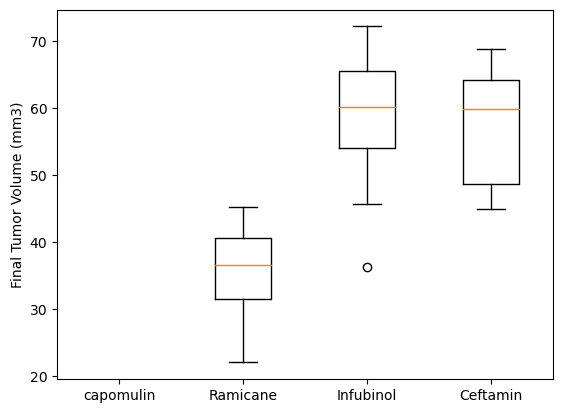

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ["capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes_tumor = tumor_volume.loc[tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(volumes_tumor)

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data)
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

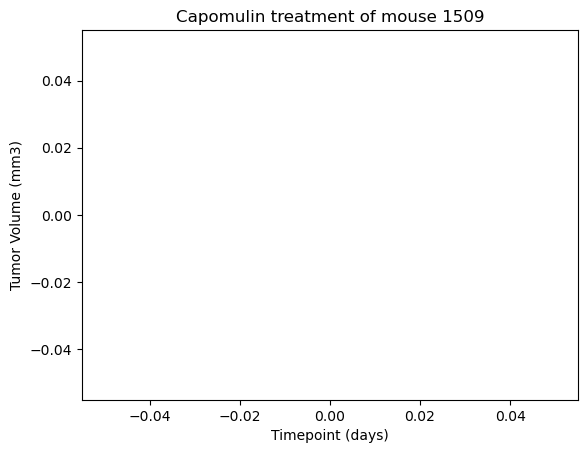

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = final_data.loc[final_data["Drug Regimen"] == "Capomulin"]
mouse_line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "1509",:]
mouse_line_df.head()

plt.plot(mouse_line_df["Timepoint"], mouse_line_df["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
plt.show()

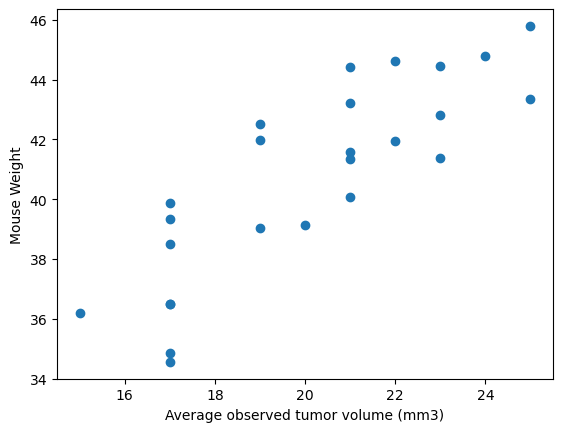

In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = final_data.loc[final_data["Drug Regimen"] == "Capomulin"]
correlation = st.pearsonr(capomulin_data['Weight (g)'], capomulin_data["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor is", correlation)
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])


plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
plt.plot(capomulin_data["Weight (g)"], intercept + slope * capomulin_data["Weight (g)"], color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor is 0.525699555207717


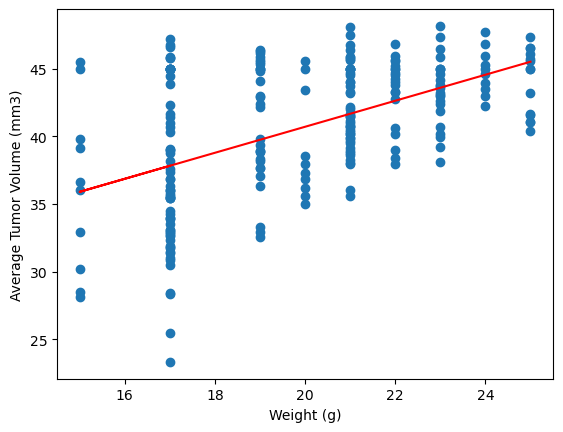

In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = final_data.loc[final_data["Drug Regimen"] == "Capomulin"]
correlation = st.pearsonr(capomulin_data['Weight (g)'], capomulin_data["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor is", correlation)
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])


plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
plt.plot(capomulin_data["Weight (g)"], intercept + slope * capomulin_data["Weight (g)"], color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()